# Telecom Churn Rate Predictions

## The Problem

Our goal is to predict if an individual customer will drop Telecom or not. We'll use machine learning models trained from 80% of the sample data and the remaining 20% will be applied to assess the trained models accuracy in predicting whether or not the customers will churn. 

## Collecting Data

This data set came from Kaggle sourced from the IBM sample data collection (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). We'll need to use certain libraries to accomplish our goal moving forward. I'll import Pandas, Numpy, Matplotlib and Seaborn initially. 

#### Importing Libraries

In [1]:
# scientific computing libaries
import pandas as pd
import numpy as np

# data mining libaries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA#, FastICA
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, learning_curve
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE

#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) # to show plots in notebook
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# offline plotly
from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

SEED = 17 # specify seed for reproducable results
pd.set_option('display.max_columns', None) # prevents abbreviation (with '...') of columns in prints

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#### Loading the data frame

In [2]:
df = pd.read_csv('Telcom.csv')

# 2. Data Exploration


In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
#checking the categories for object data types
print(df['international plan'].unique())
print(df['voice mail plan'].unique())
print(df['state'].unique())

['no' 'yes']
['yes' 'no']
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']


In [6]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


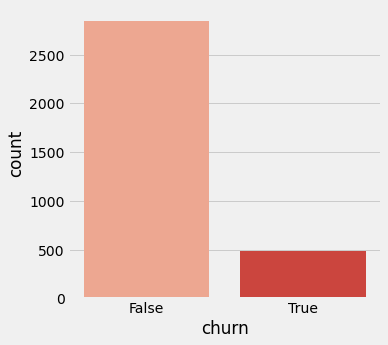

In [7]:
# apply the Fivethirtyeight style to plots.
plt.style.use("fivethirtyeight")

# display a frequency distribution for churn.
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=df['churn'], palette='Reds', linewidth=1)
plt.show()

The plot shows a class imbalance of the data between churners and non-churners. To address this, resampling would be a suitable approach. To keep this case simple, the imbalance is kept forward and specific metrics are chosen for model evaluations.

In [8]:
df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

It looks like they're losing 14.4% of their customers and retaining aroung 85.5% annually. Let's see what this looks like by each state.

In [9]:
states = df.groupby('state')['churn'].value_counts(normalize=True)
states = pd.DataFrame(states)
states.columns = ['percent']
states = states.reset_index()
states

,state,churn,percent
0,AK,False,0.942308
1,AK,True,0.057692
2,AL,False,0.900000
3,AL,True,0.100000
4,AR,False,0.800000
...,...,...,...
97,WI,True,0.089744
98,WV,False,0.905660
99,WV,True,0.094340
100,WY,False,0.883117


In [10]:
# create a function to name a column and add columns as necessary
def combine_col(name, *cols):
    df[name] = sum(cols)

In [11]:
# Finding the churn rates for each state
churn_rate_state = states.loc[states['churn'] == True].sort_values("percent", ascending =False)\
                                                        .reset_index().drop("index", axis =1)
churn_rate_state

,state,churn,percent
0,NJ,True,0.264706
1,CA,True,0.264706
2,TX,True,0.250000
3,MD,True,0.242857
4,SC,True,0.233333
5,MI,True,0.219178
6,MS,True,0.215385
7,NV,True,0.212121
8,WA,True,0.212121
9,ME,True,0.209677


There are definitely states with a higher churn rate. some are losing more than a fifth of their customers each year. Let's create a category for those states.

In [12]:
colors = plotly.colors.DEFAULT_PLOTLY_COLORS
churn_dict = {0: "no churn", 1: "churn"}

In [13]:
state_churn_df = df.groupby(["state", "churn"]).size().unstack()
trace1 = go.Bar(
    x=state_churn_df.index,
    y=state_churn_df[0],
    marker = dict(color = colors[0]),
    name='no churn'
)
trace2 = go.Bar(
    x=state_churn_df.index,
    y=state_churn_df[1],
    marker = dict(color = colors[1]),
    name='churn'
)
data = [trace1, trace2]
layout = go.Layout(
    title='Churn distribution per state',
    autosize=True,
    barmode='stack',
    margin=go.layout.Margin(l=50, r=50),
    xaxis=dict(
        title='state',
        tickangle=45
    ),
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')

We can see some states have a higher proportion of churn than others such as NJ, CA, TX, SC, MD, SC, MI, MS, NV, WA, ME, MT, AR. Others have a low churn rate. We should incorporate the state into our analysis to help predict if the customer is going to churn.

In [14]:
high_churn = churn_rate_state.loc[churn_rate_state['percent'] >= .2]
state_high_churn = list(high_churn['state'])
state_high_churn

['NJ', 'CA', 'TX', 'MD', 'SC', 'MI', 'MS', 'NV', 'WA', 'ME', 'MT', 'AR']

In [15]:
# category for mid churn rates
mid_churn = churn_rate_state.loc[(churn_rate_state['percent'] < .2)&(churn_rate_state['percent'] >=.15)]
mid_churn_states = list(mid_churn['state'])
mid_churn_states

['KS', 'NY', 'MN', 'PA', 'MA', 'CT', 'NC', 'NH']

In [16]:
# category for mid churn rates
mid_churn = churn_rate_state.loc[(churn_rate_state['percent'] < .2)&(churn_rate_state['percent'] >=.15)]
mid_churn_states = list(mid_churn['state'])
mid_churn_states

['KS', 'NY', 'MN', 'PA', 'MA', 'CT', 'NC', 'NH']

In [17]:
# lower churn rate states category
mid_low_churn = churn_rate_state.loc[(churn_rate_state['percent'] <.15)&(churn_rate_state['percent'] >= .1)]
mid_low_churn_states = list(mid_low_churn['state'])
mid_low_churn_states

['GA',
 'DE',
 'OK',
 'OR',
 'UT',
 'CO',
 'KY',
 'SD',
 'OH',
 'FL',
 'IN',
 'ID',
 'WY',
 'MO',
 'VT',
 'AL']

In [18]:
low_churn = churn_rate_state.loc[churn_rate_state['percent'] <.1]
low_churn_states = list(low_churn['state'])
low_churn_states

['NM',
 'ND',
 'WV',
 'TN',
 'DC',
 'RI',
 'WI',
 'IL',
 'NE',
 'LA',
 'IA',
 'VA',
 'AZ',
 'AK',
 'HI']

In [19]:
# assign states to high, medium, medium-low and low churn rate categories

def categorize(state):
    if state in state_high_churn:
        state = 'high'
    elif state in mid_churn_states:
        state='med'
    elif state in mid_low_churn_states:
        state = 'med-low'
    else:
         state = 'low'
    return state

In [20]:
def competition(df):

    df["state_churn_rate"] = df['state'].apply(categorize)
    return df

In [21]:
competition(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,state_churn_rate
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,med
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,med-low
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,high
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,med-low
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,med-low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False,low
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False,low
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False,low
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False,med


In [22]:
# Finding the total domestic minutes for each customer
combine_col("total_dom_minutes",
           df['total day minutes'],
           df['total eve minutes'],
           df['total night minutes'])

In [23]:
# Finding the total domestic charges for each customer
combine_col('total_dom_charges',
           df['total day charge'],
           df['total eve charge'],
           df['total night charge'])

# 3. Data Cleaning

In [24]:
#check for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
state_churn_rate          0
total_dom_minutes         0
total_dom_charges         0
dtype: int64

#### No Missing values observed

In [25]:
# check for duplicated rows
df.duplicated().sum()

0

#### No dulicated rows observed

In [26]:
# check for outliers
df.skew()

account length            0.096606
area code                 1.126823
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
churn                     2.018356
total_dom_minutes        -0.036998
total_dom_charges        -0.033641
dtype: float64

* churn has a high positive correlation with 'customer service calls' and 'area code' has a positive correlation with 'total intl calls'. 

* churn has a high positive correlation with 'customer service calls' and 'area code' has a positive correlation with 'total intl calls'. 

# 4. Feature Engineering
## Feature Extraction

In [27]:
df['number vmail messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: number vmail messages, dtype: float64

In [28]:
df['number vmail messages'][df['number vmail messages']>0].describe()

count    922.000000
mean      29.277657
std        7.559027
min        4.000000
25%       24.000000
50%       29.000000
75%       34.000000
max       51.000000
Name: number vmail messages, dtype: float64

In [29]:
df['vmail_messages'] = pd.cut(df['number vmail messages'],bins=[0,1,38,52],
                             labels=['No VM plan','Normal Users','High Frequency users'],
                             include_lowest=True)
df.head(20)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,state_churn_rate,total_dom_minutes,total_dom_charges,vmail_messages
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,med,707.2,72.86,Normal Users
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,med-low,611.5,55.54,Normal Users
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,high,527.2,59.00,No VM plan
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,med-low,558.2,65.02,No VM plan
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,med-low,501.9,49.36,No VM plan
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False,med-low,647.9,65.91,No VM plan
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False,med,779.3,76.28,Normal Users
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False,med-low,471.9,44.98,No VM plan
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False,low,751.9,70.97,No VM plan
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False,low,807.0,77.52,Normal Users


## Feature Selection

### Correlation Analysis

In order to visualize and investigate the pair-wise correlations between the features and churn, we'll use a bar graph and heatmap.

<AxesSubplot:>

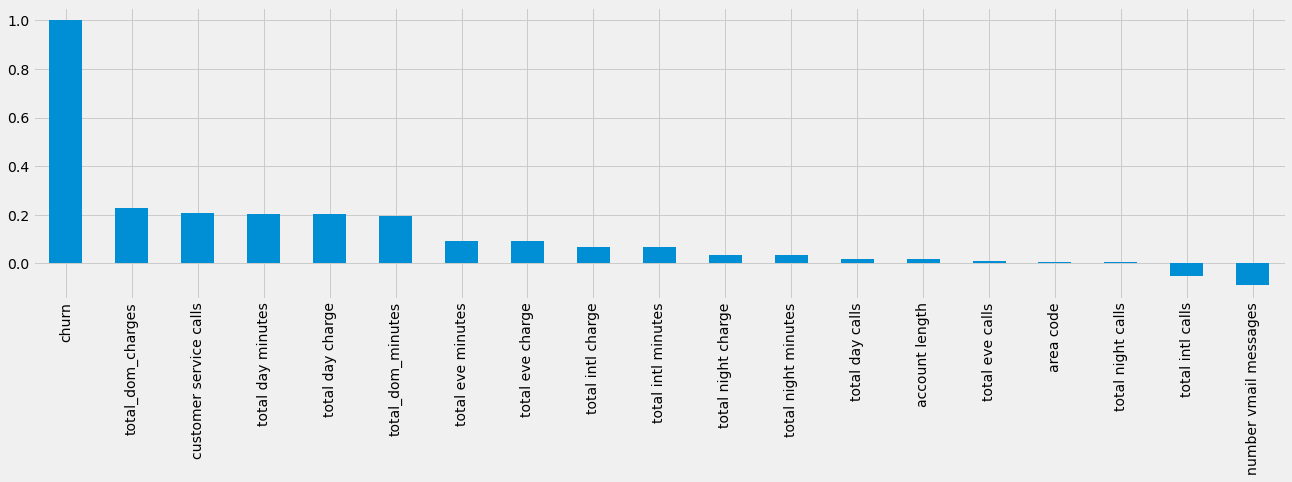

In [30]:
# Show correlation plot for correlation of Churn with each of the remaining features.
plt.figure(figsize=(16,10))
df.corr()['churn'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

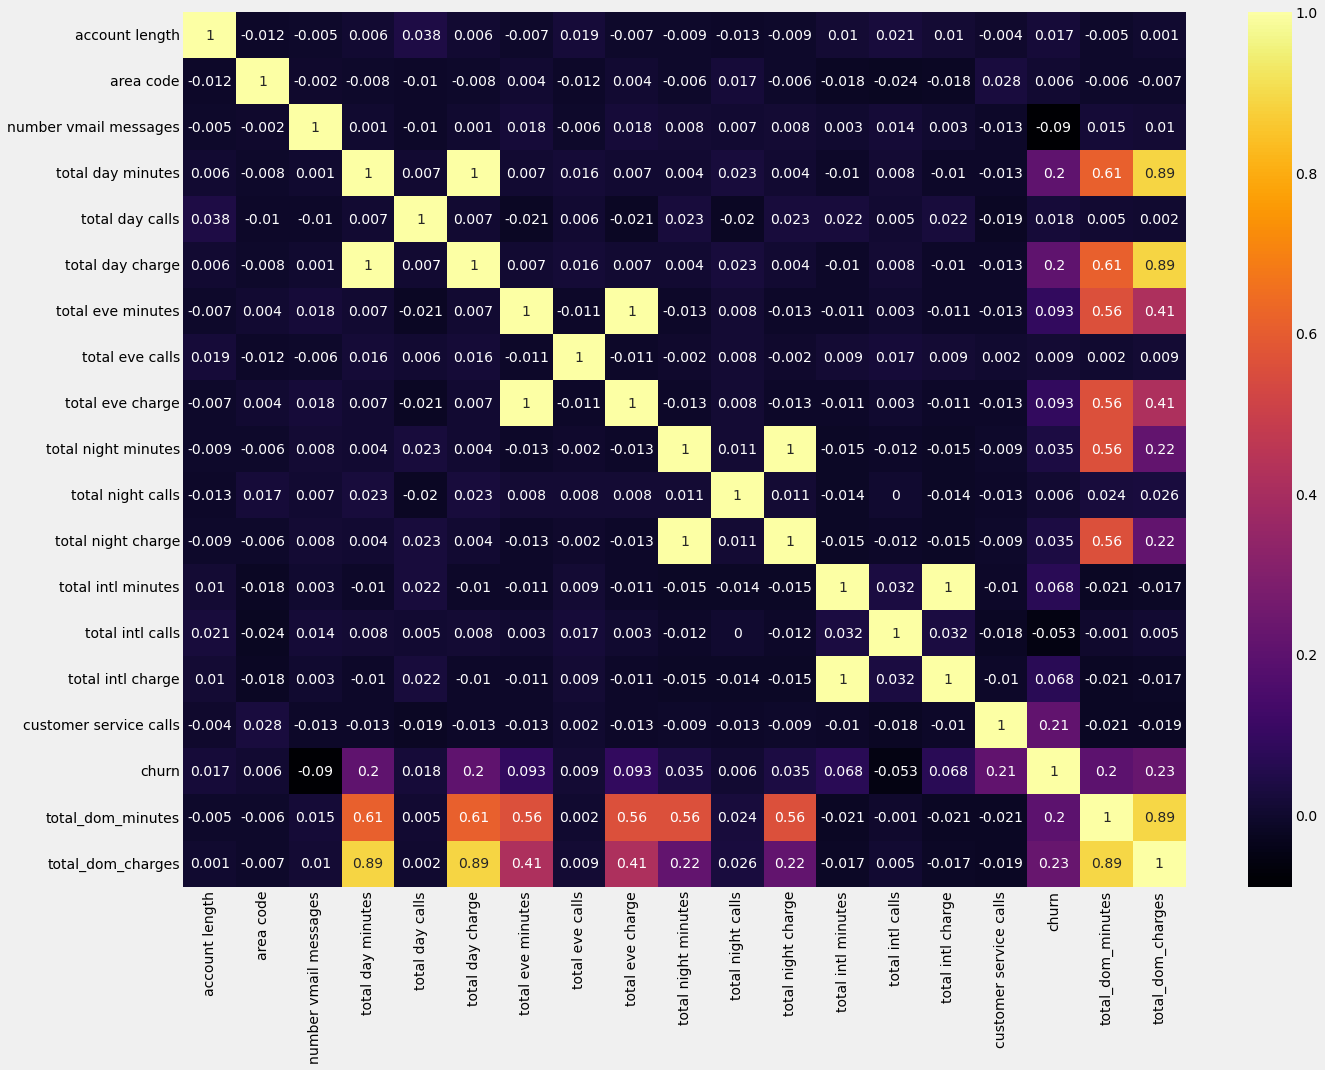

In [31]:
cor = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor.round(3),annot=True,cmap='inferno')
plt.show()

I'm going to remove highly correlated features:

* total_night_minutes
* total_eve_minutes
* total_day_minutes
* tatal_intl_minutes

In [32]:
# Generate box plots using the math library

import math

def boxplot(x, y, df):
    columns = len(y)
    rows = math.ceil(columns/3)
    plt.figure(figsize=(7*columns, 7*rows))
    for i, j in enumerate(y):
        plt.subplot(rows, columns, i+1)
        ax = sns.boxplot(x=x, y=j, data=df[[x, j]], palette="Blues", linewidth=1)
        ax.set_title(j)
    return plt.show()

<Figure size 6000x4500 with 0 Axes>

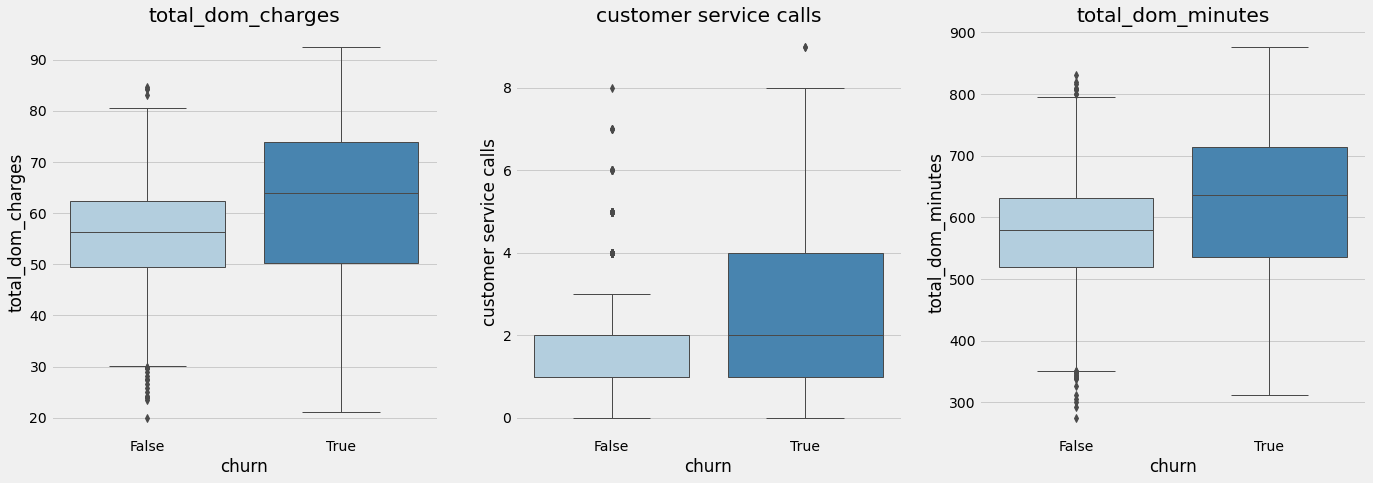

In [33]:
# Generate boxplots for total_dom_charges, customer service calls and total_dom_minutes.
plt.figure(figsize=(20,15), dpi=300)
boxplot("churn", ["total_dom_charges", "customer service calls", "total_dom_minutes"], df)

Plot insights:
* Churning customers have total domestic charge median of $64.
* Churning customers have a median customer service call rate of 2 calls.
* Churning customers have a median domestic minute usage of 650 minutes.

### Feature selection using ANOVA

#### ANOVA is used for comparing the distribution of a numeric variable in two or more groups
* Ho = Null Hypothesis = the distribution of the varible in multiple groups is uniform
* Ha = Alternate Hypothesis = the distribution of the variable in multiple groups in different
    
    we analyse the pvalue, lets say for confidence interval of 95%, significance level = 5%

`if pvalue>0.05 = accept the null hypothesis and the feature is NOT important`
`if pvalue <0.05 = reject the null hypothesis and the feature is important`

#### ANOVA summary:

ANOVA stands for Analysis of Variance and it is a statistical method for testing if the means of different groups are equal. In Python, ANOVA can be performed using the f_oneway function from the scipy.stats library. This function takes in multiple sets of data, each representing a group, and returns a test statistic and p-value. The test statistic measures the difference between the means of the groups and the p-value gives the probability of observing a difference as large or larger than what was observed if the means were actually equal. If the p-value is low, we can reject the null hypothesis that the means are equal, implying that there is a significant difference between the means of at least two groups.

#### In simple terms:

ANOVA, or Analysis of Variance, is a statistical method for comparing multiple groups or populations to see if their means are significantly different from each other. In simple terms, it tells us if the difference between the groups' averages is due to chance or if it's real. To perform ANOVA in Python, we can use the f_oneway function from the scipy.stats library. This function takes in multiple arrays of data, and returns a test statistic and a p-value. The p-value represents the probability of observing the difference between the groups if they are actually all the same. If the p-value is below a certain threshold (usually 0.05), we reject the null hypothesis (that the groups have the same mean) and conclude that at least one of the groups is different.

In [34]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'state_churn_rate',
       'total_dom_minutes', 'total_dom_charges', 'vmail_messages'],
      dtype='object')

In [35]:
numerics =['account length','number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']
xnum = df[numerics]
y = df['churn']
from sklearn.feature_selection import f_classif
fval,pval = f_classif(xnum,y)
for i in range(len(numerics)):print(numerics[i],pval[i])

account length 0.33976000705720666
number vmail messages 2.1175218402696038e-07
total day minutes 5.300278227509361e-33
total day calls 0.28670102402211844
total day charge 5.30060595239102e-33
total eve minutes 8.011338561256927e-08
total eve calls 0.5941305829720491
total eve charge 8.036524227754477e-08
total night minutes 0.04046648463758881
total night calls 0.7230277872081609
total night charge 0.040451218769160205
total intl minutes 8.05731126549437e-05
total intl calls 0.002274701409850077
total intl charge 8.018753583047257e-05
customer service calls 3.900360240185746e-34


### Feature selection using Chi Square Test

- Used to compare the distribution of categories of a categorical feature in two or more groups
- in nutshell to compare whether a categorical attribute has some relationship with the other categorical attribute

* H0 = Null Hypothesis = the categorical attribute has uniform distribution in two or more groups
* Ha = Alternate hypothesis = the categorical attribute has different distribution in two or more groups

We always analyse the pvalue, consider 95% as confidence interval, significance level = 5% i.e.0.05

`if pvalue >0.05 = accept the Null hypothesis - feature is not important`
`if pvalue <0.05 = reject the Null hypothesis - feature is important`

#### Chi Square test summary:
The chi-square test is a statistical test used to determine if there is a significant association between two categorical variables. It measures the difference between the expected frequencies of the variables and the observed frequencies in a sample data. If the difference is too large, it suggests that the variables are not independent and there is a relationship between them. The test returns a p-value, which represents the probability of observing the difference by chance if the variables are independent. A small p-value indicates that it is unlikely that the relationship between the variables is due to chance and suggests that the variables are associated.

#### In simple terms:
Chi-Square test is a statistical test used to determine if there is a significant association between two categorical variables.

Imagine you have a table with two categories, "red" and "blue". The Chi-Square test can tell you if there is a relationship between the two categories. For example, if you have a table that shows the number of red and blue candies in a jar, the Chi-Square test can tell you if there is a significant difference in the number of red and blue candies in the jar.

It's like asking if the red and blue candies are evenly distributed in the jar or if one color is more common than the other. The test helps you answer this question by comparing the expected number of red and blue candies with the actual number you observe. If the difference is too big, it suggests that there is a relationship between the two categories.

In simple terms, the Chi-Square test is a way to see if there is a connection between two things by counting how many of each thing there are and comparing the result with what you expect to see.

In [36]:
categories = ['state','area code','phone number', 'international plan',
       'voice mail plan','vmail_messages']

y = df['churn']
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
for col in categories:
    xcat = LabelEncoder().fit_transform(df[col]).reshape(-1,1)
    cval,pval = chi2(xcat,y)
    print(col,pval)

state [0.19214979]
area code [0.89394206]
phone number [1.91173945e-14]
international plan [4.09173473e-46]
voice mail plan [5.28486023e-07]
vmail_messages [0.0396314]


In [37]:
#selecting important features based on previous analysis
x = df[['international plan','vmail_messages','total day minutes','total eve minutes',
     'total night minutes','total intl minutes','customer service calls']]
y = df['churn']

# 5. Preprocessing

In [38]:
x.head()

,international plan,vmail_messages,total day minutes,total eve minutes,total night minutes,total intl minutes,customer service calls
0,no,Normal Users,265.1,197.4,244.7,10.0,1
1,no,Normal Users,161.6,195.5,254.4,13.7,1
2,no,No VM plan,243.4,121.2,162.6,12.2,0
3,yes,No VM plan,299.4,61.9,196.9,6.6,2
4,yes,No VM plan,166.7,148.3,186.9,10.1,3


#### encoding categorical features

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
preprocessor = ColumnTransformer([('ohe',OneHotEncoder(),[1]),
                                ('ode',OrdinalEncoder(),[0]),
                                 ('sc',StandardScaler(),[2,3,4,5,6])],remainder='passthrough')

In [40]:
x_new = preprocessor.fit_transform(x)
pd.DataFrame(x_new).head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,1.566767,-0.070610,0.866743,-0.085008,-0.427932
1,0.0,0.0,1.0,0.0,-0.333738,-0.108080,1.058571,1.240482,-0.427932
2,0.0,1.0,0.0,0.0,1.168304,-1.573383,-0.756869,0.703121,-1.188218
3,0.0,1.0,0.0,1.0,2.196596,-2.742865,-0.078551,-1.303026,0.332354
4,0.0,1.0,0.0,1.0,-0.240090,-1.038932,-0.276311,-0.049184,1.092641


In [70]:
# train Test Split before preprocessing

#### Train Test Split

In [41]:
# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_new,y,test_size=0.2,random_state=5)
print(x.shape)
print(xtrain.shape)
print(xtest.shape)
print(y.shape)
print(ytrain.shape)
print(ytest.shape)

(3333, 7)
(2666, 9)
(667, 9)
(3333,)
(2666,)
(667,)


# 6. Apply Machine Learning algorithm - Logistic regression

#### Logistic Regression Summary:

Logistic Regression is a machine learning technique used for predicting a binary outcome (yes/no, 0/1) based on a set of independent variables. In Python, it can be implemented using the LogisticRegression module from the scikit-learn library. The algorithm creates a mathematical model to estimate the probability of the binary outcome based on the input variables, and then predicts the output class based on a threshold value (e.g., 0.5). The parameters of the model are learned from the training data through an optimization process. Logistic Regression can be used for various types of problems, including binary classification and multinomial classification.

#### In simple terms:

Logistic Regression is a machine learning algorithm used for classification problems. It is used to predict a binary outcome (1 or 0) based on one or more independent variables. In simpler terms, it helps us predict whether an event will occur or not.

Imagine you have data about people and their income, education level, and age, and you want to predict whether a person is likely to buy a car or not. Logistic Regression can help us make that prediction based on the information we have about those people.

In Python, you can implement Logistic Regression using the scikit-learn library. First, you will split your data into a training and test set. Then, you will use the training set to fit a Logistic Regression model. Finally, you will evaluate the model using the test set to see how accurate it is in making predictions.

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(xtrain,ytrain)

LogisticRegression(class_weight='balanced')

# 7. Performance Analysis


In [43]:
# performance analysis
from sklearn import metrics
ypred = model.predict(xtest)
print("Accuracy : ",metrics.accuracy_score(ytest,ypred))
print("Recall : ",metrics.recall_score(ytest,ypred))
print("F1 score : ",metrics.f1_score(ytest,ypred))
print("Precision : ",metrics.precision_score(ytest,ypred))

Accuracy :  0.775112443778111
Recall :  0.7934782608695652
F1 score :  0.4932432432432432
Precision :  0.35784313725490197


Accuracy: It measures the ratio of correct predictions to the total number of predictions made. A score of 0.775 means 77.5% of the predictions made were correct.

Recall: It measures the number of actual positive cases that were correctly predicted as positive. A score of 0.793 means 79.3% of the actual positive cases were correctly predicted.

F1 score: It is the harmonic mean of precision and recall. It balances both precision and recall. A score of 0.49 means the balance between precision and recall was 49%.

Precision: It measures the number of positive predictions that were actually correct. A score of 0.35 means 35.7% of the positive predictions were actually correct.

In [44]:
# performance analysis on train data
ypred2 = model.predict(xtrain)
print("Accuracy : ",metrics.accuracy_score(ytrain,ypred2))
print("Recall : ",metrics.recall_score(ytrain,ypred2))
print("F1 score : ",metrics.f1_score(ytrain,ypred2))
print("Precision : ",metrics.precision_score(ytrain,ypred2))

Accuracy :  0.764066016504126
Recall :  0.7570332480818415
F1 score :  0.4848484848484849
Precision :  0.3566265060240964


Accuracy: It measures the ratio of correct predictions to the total number of predictions made. A score of 0.76 means 76% of the predictions made were correct.

Recall: It measures the number of actual positive cases that were correctly predicted as positive. A score of 0.76 means 75.7% of the actual positive cases were correctly predicted.

F1 score: It is the harmonic mean of precision and recall. It balances both precision and recall. A score of 0.48 means the balance between precision and recall was 48%.

Precision: It measures the number of positive predictions that were actually correct. A score of 0.35 means 35.6% of the positive predictions were actually correct.

### Observation - Recall is not satisfactory
So we will now try other algorithms

# Improving and Fine-Tuning

1. Improving Data:
* Enhance feature engineering
* Obtain additional data - features or samples
* Enhance data preprocessing steps
* Refine feature selection process - eliminate irrelevant features
2. Improving Modeling:
* Adjust hyperparameters to optimize algorithm performance
* Utilize a different machine learning algorithm
* Implement ensemble methods combining multiple algorithms for improved predictions.

## Decision Tree Classifier

In [45]:
# preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
preprocessor = ColumnTransformer([('ohe',OneHotEncoder(),[1]),
                                ('ode',OrdinalEncoder(),[0])],
                                remainder="passthrough")
x_new = preprocessor.fit_transform(x)
pd.DataFrame(x_new)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,265.1,197.4,244.7,10.0,1.0
1,0.0,0.0,1.0,0.0,161.6,195.5,254.4,13.7,1.0
2,0.0,1.0,0.0,0.0,243.4,121.2,162.6,12.2,0.0
3,0.0,1.0,0.0,1.0,299.4,61.9,196.9,6.6,2.0
4,0.0,1.0,0.0,1.0,166.7,148.3,186.9,10.1,3.0
...,...,...,...,...,...,...,...,...,...
3328,0.0,0.0,1.0,0.0,156.2,215.5,279.1,9.9,2.0
3329,0.0,1.0,0.0,0.0,231.1,153.4,191.3,9.6,3.0
3330,0.0,1.0,0.0,0.0,180.8,288.8,191.9,14.1,2.0
3331,0.0,1.0,0.0,1.0,213.8,159.6,139.2,5.0,2.0


# train test split
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y, test_size=0.2, random_state=5)
# don't need to do train test split again
# Print shapes of data
print("x shape:", x.shape)
print("xtrain shape:", xtrain.shape)
print("xtest shape:", xtest.shape)
print("y shape:", y.shape)
print("ytrain shape:", ytrain.shape)
print("ytest shape:", ytest.shape)

In [47]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=5,class_weight={0:0.5,1:0.5})
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, random_state=5)

### Visualizing the tree model

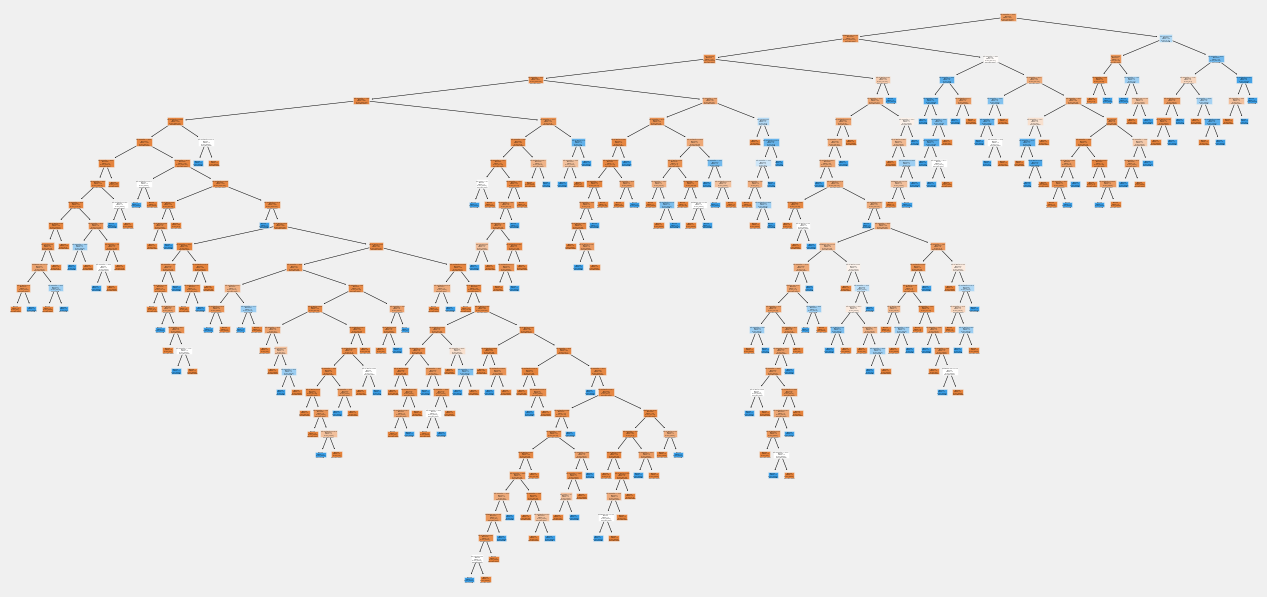

In [48]:
import matplotlib.pyplot as plt
from sklearn import tree

fname = ['International plan', 'vmail_NO_Plan','vmail_Normal','vmail_HF', 'Total day minutes',
       'Total eve minutes', 'Total night minutes', 'Total intl minutes',
       'Customer service calls']
cname = ['Not Leaving','Leaving']

plt.figure(figsize=(20,10))
tree.plot_tree(model2, feature_names=fname, class_names=cname, filled=True)
plt.show()

In [49]:
# performance analysis
ypred2 = model2.predict(xtest)
print("Accuracy : ",metrics.accuracy_score(ytest,ypred2))
print("Recall : ",metrics.recall_score(ytest,ypred2))
print("F1 score : ",metrics.f1_score(ytest,ypred2))
print("Precision : ",metrics.precision_score(ytest,ypred2))

Accuracy :  0.8995502248875562
Recall :  0.7391304347826086
F1 score :  0.6699507389162561
Precision :  0.6126126126126126


Accuracy: It measures the ratio of correct predictions to the total number of predictions made. A score of 0.89 means 73% of the predictions made were correct.

Recall: It measures the number of actual positive cases that were correctly predicted as positive. A score of 0.739 means 73.9% of the actual positive cases were correctly predicted.

F1 score: It is the harmonic mean of precision and recall. It balances both precision and recall. A score of 0.669 means the balance between precision and recall was 66.9%.

Precision: It measures the number of positive predictions that were actually correct. A score of 0.612 means 61.2% of the positive predictions were actually correct.

In [50]:

# performance analysis on train data
ypred2 = model2.predict(xtrain)
print("Accuracy : ",metrics.accuracy_score(ytrain,ypred2))
print("Recall : ",metrics.recall_score(ytrain,ypred2))
print("F1 score : ",metrics.f1_score(ytrain,ypred2))
print("Precision : ",metrics.precision_score(ytrain,ypred2))

Accuracy :  1.0
Recall :  1.0
F1 score :  1.0
Precision :  1.0


Accuracy: It measures the ratio of correct predictions to the total number of predictions made. A score of 1 means 100% of the predictions made were correct.

Recall: It measures the number of actual positive cases that were correctly predicted as positive. A score of 1 means 100% of the actual positive cases were correctly predicted.

F1 score: It is the harmonic mean of precision and recall. It balances both precision and recall. A score of 1 means the balance between precision and recall was 100%.

Precision: It measures the number of positive predictions that were actually correct. A score of 1 means 100% of the positive predictions were actually correct.

## Overfitting
Test data performance: low

Train data performance: high

Causes of Overfitting

Complex model that is too specific to the training data
Too many features or not enough data to support the complexity of the model
Using features that are not relevant to the target
Solutions for Overfitting

Reduce the complexity of the model
Use regularization techniques like L1 or L2 regularization
Use early stopping to stop training when performance on validation set starts to decrease
Use cross-validation to get a better estimate of model performance
Remove irrelevant features from the data set
Increase the size of the training data set.

## Underfitting
`performance of model on test data = low`

`performance of model on train data = low`


**Reasons for underfitting**
- lack of informative features
- lack of a powerful algorithm, as the existing features may have silghtly complex/nonlinear relation with the target and the current algorithm is not able to learn
- presence of noisy observations


**Ways to handle underfitting situation**
- colllect/ create more features, perform feature extraction
- collect more columns, NO BENFIT from collecting rows
- Try a more powerful/complex predictive algorithm
- In case of deicision tree, increase the value of max_depth, decrease the value of min_samples_leaf and min_samples_split
- perform better data cleaning, handling outliers etc.

## Optimal Model
Test Data Performance = High

Train Data Performance = High

## Hyperparameter Tuning for decision tree using Gridsearch

In [51]:
param_grid = {"max_depth":np.arange(3,25,2),
              "min_samples_leaf":np.arange(3,50,2),
              "min_samples_split":np.arange(10,120,5)}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=5),
                          param_grid=param_grid,n_jobs=-1,
                          scoring='recall',verbose=True,cv=5)
grid_search.fit(x_new,y)

Fitting 5 folds for each of 5808 candidates, totalling 29040 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5), n_jobs=-1,
             param_grid={'max_depth': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]),
                         'min_samples_leaf': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49]),
                         'min_samples_split': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115])},
             scoring='recall', verbose=True)

In [52]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.6708762886597939
{'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 10}


In [53]:
# Controlling overfitting
model2 = DecisionTreeClassifier(criterion='gini',random_state=5,
                               max_depth=8,min_samples_leaf=5,min_samples_split=20)
model2.fit(xtrain,ytrain)


DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=20,
                       random_state=5)

In [54]:
# performance analysis On test data
ypred2 = model2.predict(xtest)
print("Accuracy : ",metrics.accuracy_score(ytest,ypred2))
print("Recall : ",metrics.recall_score(ytest,ypred2))
print("F1 score : ",metrics.f1_score(ytest,ypred2))
print("Precision : ",metrics.precision_score(ytest,ypred2))

Accuracy :  0.9430284857571214
Recall :  0.7065217391304348
F1 score :  0.7738095238095237
Precision :  0.8552631578947368


Accuracy: It measures the ratio of correct predictions to the total number of predictions made. A score of 0.943 means 94.3% of the predictions made were correct.

Recall: It measures the number of actual positive cases that were correctly predicted as positive. A score of 0.70 means 70% of the actual positive cases were correctly predicted.

F1 score: It is the harmonic mean of precision and recall. It balances both precision and recall. A score of 0.77 means the balance between precision and recall was 77%.

Precision: It measures the number of positive predictions that were actually correct. A score of 0.85 means 85% of the positive predictions were actually correct.

In [55]:
# performance analysis on train data
ypred2 = model2.predict(xtrain)
print("Accuracy : ",metrics.accuracy_score(ytrain,ypred2))
print("Recall : ",metrics.recall_score(ytrain,ypred2))
print("F1 score : ",metrics.f1_score(ytrain,ypred2))
print("Precision : ",metrics.precision_score(ytrain,ypred2))

Accuracy :  0.9471117779444861
Recall :  0.6956521739130435
F1 score :  0.7941605839416058
Precision :  0.9251700680272109


Accuracy: It measures the ratio of correct predictions to the total number of predictions made. A score of 0.947 means 94.7% of the predictions made were correct.

Recall: It measures the number of actual positive cases that were correctly predicted as positive. A score of 0.695 means 69.5% of the actual positive cases were correctly predicted.

F1 score: It is the harmonic mean of precision and recall. It balances both precision and recall. A score of 0.794 means the balance between precision and recall was 79.4%.

Precision: It measures the number of positive predictions that were actually correct. A score of 0.925 means 92.5% of the positive predictions were actually correct.

### Feature importances

In [56]:
model2.feature_importances_
for i in range(len(fname)):print(fname[i],model2.feature_importances_[i])

International plan 0.0
vmail_NO_Plan 0.07957197040961295
vmail_Normal 0.0
vmail_HF 0.1034922637532645
Total day minutes 0.35860654052548413
Total eve minutes 0.1721940195076953
Total night minutes 0.04746707503384585
Total intl minutes 0.08934222663734767
Customer service calls 0.1493259041327496


## Random Forest

In [57]:
import random
from sklearn.ensemble import RandomForestClassifier

random_state = 5
n_estimators = 100
max_depth = 8
oob_score = True

model4 = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state,
                                max_depth=max_depth, oob_score=oob_score)

model4.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=8, oob_score=True, random_state=5)

In [58]:
# performance analysis On test data
ypred2 = model4.predict(xtest)
print("Accuracy : ",metrics.accuracy_score(ytest,ypred2))
print("Recall : ",metrics.recall_score(ytest,ypred2))
print("F1 score : ",metrics.f1_score(ytest,ypred2))
print("Precision : ",metrics.precision_score(ytest,ypred2))

Accuracy :  0.9445277361319341
Recall :  0.6521739130434783
F1 score :  0.7643312101910829
Precision :  0.9230769230769231


Accuracy: It measures the ratio of correct predictions to the total number of predictions made. A score of 0.944 means 94.4% of the predictions made were correct.

Recall: It measures the number of actual positive cases that were correctly predicted as positive. A score of 0.652 means 76.4% of the actual positive cases were correctly predicted.

F1 score: It is the harmonic mean of precision and recall. It balances both precision and recall. A score of 0.764 means the balance between precision and recall was 76.4%.

Precision: It measures the number of positive predictions that were actually correct. A score of 0.923 means 92.3% of the positive predictions were actually correct.

In [59]:
# performance analysis on train data
ypred2 = model4.predict(xtrain)
print("Accuracy : ",metrics.accuracy_score(ytrain,ypred2))
print("Recall : ",metrics.recall_score(ytrain,ypred2))
print("F1 score : ",metrics.f1_score(ytrain,ypred2))
print("Precision : ",metrics.precision_score(ytrain,ypred2))

Accuracy :  0.959489872468117
Recall :  0.7237851662404092
F1 score :  0.8397626112759643
Precision :  1.0


Accuracy: It measures the ratio of correct predictions to the total number of predictions made. A score of 0.959 means 95.9% of the predictions made were correct.

Recall: It measures the number of actual positive cases that were correctly predicted as positive. A score of 0.723 means 72.3% of the actual positive cases were correctly predicted.

F1 score: It is the harmonic mean of precision and recall. It balances both precision and recall. A score of 0.84 means the balance between precision and recall was 84%.

Precision: It measures the number of positive predictions that were actually correct. A score of 1 means 100% of the positive predictions were actually correct.

In [60]:
#check OOB (out of bag) score
model4.oob_score_

0.9358589647411854

## Adaboost

In [61]:
from sklearn.ensemble import AdaBoostClassifier
model5 = AdaBoostClassifier(n_estimators=120,random_state=5,learning_rate=0.2)
model5.fit(xtrain,ytrain)

AdaBoostClassifier(learning_rate=0.2, n_estimators=120, random_state=5)

In [62]:
# performance analysis On test data
ypred2 = model5.predict(xtest)
print("Accuracy : ",metrics.accuracy_score(ytest,ypred2))
print("Recall : ",metrics.recall_score(ytest,ypred2))
print("F1 score : ",metrics.f1_score(ytest,ypred2))
print("Precision : ",metrics.precision_score(ytest,ypred2))

Accuracy :  0.8830584707646177
Recall :  0.32608695652173914
F1 score :  0.43478260869565216
Precision :  0.6521739130434783


Accuracy: It measures the ratio of correct predictions to the total number of predictions made. A score of 0.883 means 88.3% of the predictions made were correct.

Recall: It measures the number of actual positive cases that were correctly predicted as positive. A score of 0.326 means 32.6% of the actual positive cases were correctly predicted.

F1 score: It is the harmonic mean of precision and recall. It balances both precision and recall. A score of 0.434 means the balance between precision and recall was 43.4%.

Precision: It measures the number of positive predictions that were actually correct. A score of 0.652 means 65.2% of the positive predictions were actually correct.

In [63]:
# performance analysis on train data
ypred2 = model5.predict(xtrain)
print("Accuracy : ",metrics.accuracy_score(ytrain,ypred2))
print("Recall : ",metrics.recall_score(ytrain,ypred2))
print("F1 score : ",metrics.f1_score(ytrain,ypred2))
print("Precision : ",metrics.precision_score(ytrain,ypred2))

Accuracy :  0.8788447111777945
Recall :  0.3350383631713555
F1 score :  0.4478632478632479
Precision :  0.6752577319587629


Accuracy: It measures the ratio of correct predictions to the total number of predictions made. A score of 0.878 means 87.8% of the predictions made were correct.

Recall: It measures the number of actual positive cases that were correctly predicted as positive. A score of 0.335 means 33.5% of the actual positive cases were correctly predicted.

F1 score: It is the harmonic mean of precision and recall. It balances both precision and recall. A score of 0.447 means the balance between precision and recall was 44.7%.

Precision: It measures the number of positive predictions that were actually correct. A score of 0.675 means 67.5% of the positive predictions were actually correct.

## Gradient Boosting Trees

In [64]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
model6 = GradientBoostingClassifier(learning_rate=0.1,n_estimators=150,random_state=5)
model6.fit(xtrain,ytrain)

GradientBoostingClassifier(n_estimators=150, random_state=5)

In [65]:
# performance analysis On test data
ypred2 = model6.predict(xtest)
print("Accuracy : ",metrics.accuracy_score(ytest,ypred2))
print("Recall : ",metrics.recall_score(ytest,ypred2))
print("F1 score : ",metrics.f1_score(ytest,ypred2))
print("Precision : ",metrics.precision_score(ytest,ypred2))

Accuracy :  0.9415292353823088
Recall :  0.6630434782608695
F1 score :  0.7577639751552795
Precision :  0.8840579710144928


Accuracy: It measures the ratio of correct predictions to the total number of predictions made. A score of 0.94 means 94% of the predictions made were correct.

Recall: It measures the number of actual positive cases that were correctly predicted as positive. A score of 0.663 means 66.3% of the actual positive cases were correctly predicted.

F1 score: It is the harmonic mean of precision and recall. It balances both precision and recall. A score of 0.757 means the balance between precision and recall was 75.7%.

Precision: It measures the number of positive predictions that were actually correct. A score of 0.884 means 88.4% of the positive predictions were actually correct.

In [66]:
# performance analysis on train data
ypred2 = model6.predict(xtrain)
print("Accuracy : ",metrics.accuracy_score(ytrain,ypred2))
print("Recall : ",metrics.recall_score(ytrain,ypred2))
print("F1 score : ",metrics.f1_score(ytrain,ypred2))
print("Precision : ",metrics.precision_score(ytrain,ypred2))


Accuracy :  0.9643660915228808
Recall :  0.7621483375959079
F1 score :  0.8625180897250362
Precision :  0.9933333333333333


Accuracy: It measures the ratio of correct predictions to the total number of predictions made. A score of 0.964 means 96.4% of the predictions made were correct.

Recall: It measures the number of actual positive cases that were correctly predicted as positive. A score of 0.762 means 76.2% of the actual positive cases were correctly predicted.

F1 score: It is the harmonic mean of precision and recall. It balances both precision and recall. A score of 0.86 means the balance between precision and recall was 86%.

Precision: It measures the number of positive predictions that were actually correct. A score of 0.99 means 99% of the positive predictions were actually correct.

## XGBosst

In [67]:
from xgboost import XGBClassifier
model7 = XGBClassifier(learning_rate=0.005,n_estimators=120,max_depth=8)
model7.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=120, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [68]:
# performance analysis On test data
ypred2 = model7.predict(xtest)
print("Accuracy : ",metrics.accuracy_score(ytest,ypred2))
print("Recall : ",metrics.recall_score(ytest,ypred2))
print("F1 score : ",metrics.f1_score(ytest,ypred2))
print("Precision : ",metrics.precision_score(ytest,ypred2))

Accuracy :  0.9445277361319341
Recall :  0.7065217391304348
F1 score :  0.7784431137724551
Precision :  0.8666666666666667


Accuracy: It measures the ratio of correct predictions to the total number of predictions made. A score of 0.944 means 94.4% of the predictions made were correct.

Recall: It measures the number of actual positive cases that were correctly predicted as positive. A score of 0.706 means 70.6% of the actual positive cases were correctly predicted.

F1 score: It is the harmonic mean of precision and recall. It balances both precision and recall. A score of 0.778 means the balance between precision and recall was 77.8%.

Precision: It measures the number of positive predictions that were actually correct. A score of 0.866 means 86.6% of the positive predictions were actually correct.

In [69]:
# performance analysis on train data
ypred2 = model7.predict(xtrain)
print("Accuracy : ",metrics.accuracy_score(ytrain,ypred2))
print("Recall : ",metrics.recall_score(ytrain,ypred2))
print("F1 score : ",metrics.f1_score(ytrain,ypred2))
print("Precision : ",metrics.precision_score(ytrain,ypred2))

Accuracy :  0.9591147786946737
Recall :  0.7442455242966752
F1 score :  0.8422575976845152
Precision :  0.97


Accuracy: It measures the ratio of correct predictions to the total number of predictions made. A score of 0.959 means 95.9% of the predictions made were correct.

Recall: It measures the number of actual positive cases that were correctly predicted as positive. A score of 0.744 means 74.4% of the actual positive cases were correctly predicted.

F1 score: It is the harmonic mean of precision and recall. It balances both precision and recall. A score of 0.84 means the balance between precision and recall was 84%.

Precision: It measures the number of positive predictions that were actually correct. A score of 0.97 means 97% of the positive predictions were actually correct.